In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("Probiotics _Teja.csv")

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           10 non-null     object
 1   Website           10 non-null     object
 2   Relevant          10 non-null     object
 3   Category          10 non-null     object
 4   Manufacturer      10 non-null     object
 5   Brand             10 non-null     object
 6   F&B               10 non-null     object
 7   Probiotics        10 non-null     object
 8   Fortification     10 non-null     object
 9   Gut Health        10 non-null     object
 10  Womens Health     10 non-null     object
 11  Cognitive Health  10 non-null     object
 12  Distribution      10 non-null     object
dtypes: object(13)
memory usage: 1.1+ KB
None


In [4]:
# Display summary statistics
print(df.describe())

        Company                Website Relevant Category Manufacturer Brand  \
count        10                     10       10       10           10    10   
unique       10                     10        2        2            1     2   
top     Nestle   http://www.nestle.com      Yes      F&B          Yes   Yes   
freq          1                      1        9        6           10     9   

        F&B Probiotics Fortification Gut Health Womens Health  \
count    10         10            10         10            10   
unique    2          2             1          2             2   
top     Yes        Yes           Yes        Yes           Yes   
freq      7          9            10          9             7   

       Cognitive Health Distribution  
count                10           10  
unique                2            1  
top                 Yes         Yes   
freq                  5           10  


In [5]:
# Check for missing values
print(df.isnull().sum())

Company             0
Website             0
Relevant            0
Category            0
Manufacturer        0
Brand               0
F&B                 0
Probiotics          0
Fortification       0
Gut Health          0
Womens Health       0
Cognitive Health    0
Distribution        0
dtype: int64


In [6]:
# Analyze the distribution of categories
category_distribution = df['Category'].value_counts()
print("\nCategory Distribution:")
print(category_distribution)


Category Distribution:
Category
F&B                    6
Bulk (Manufacturer)    4
Name: count, dtype: int64


In [7]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [8]:
# Analyze the distribution of relevant companies
relevant_distribution = df['Relevant'].value_counts()
print("\nRelevant Companies Distribution:")
print(relevant_distribution)


Relevant Companies Distribution:
Relevant
Yes    9
No     1
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4784\4186668436.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


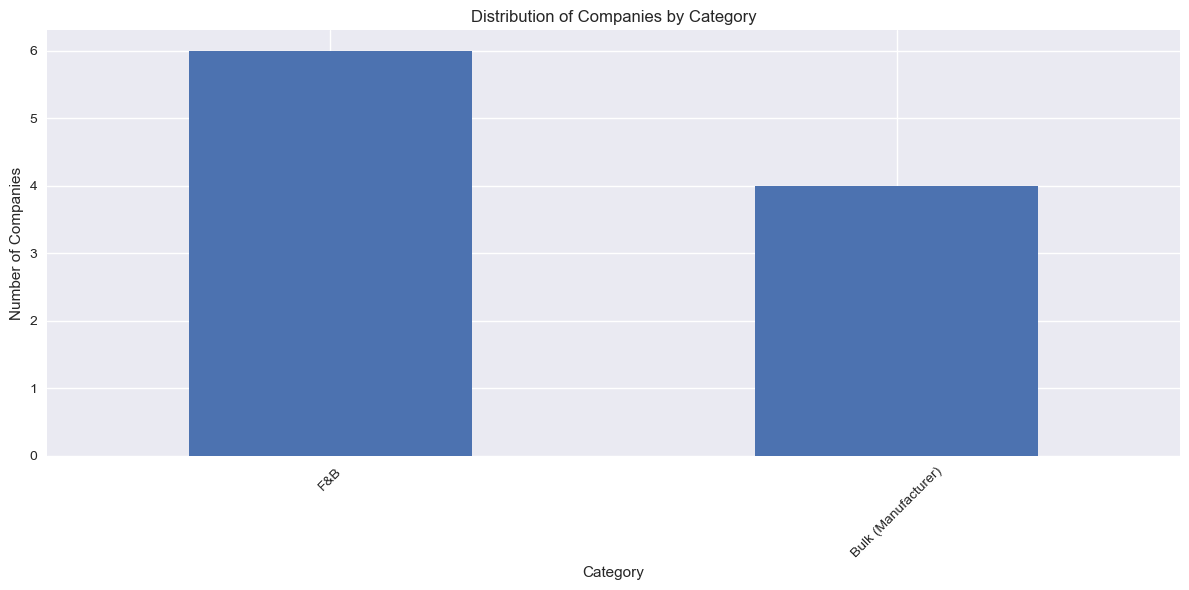

In [9]:
# Set the style for better-looking plots
plt.style.use('seaborn')

# 1. Bar plot of Category Distribution
plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar')
plt.title('Distribution of Companies by Category')
plt.xlabel('Category')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

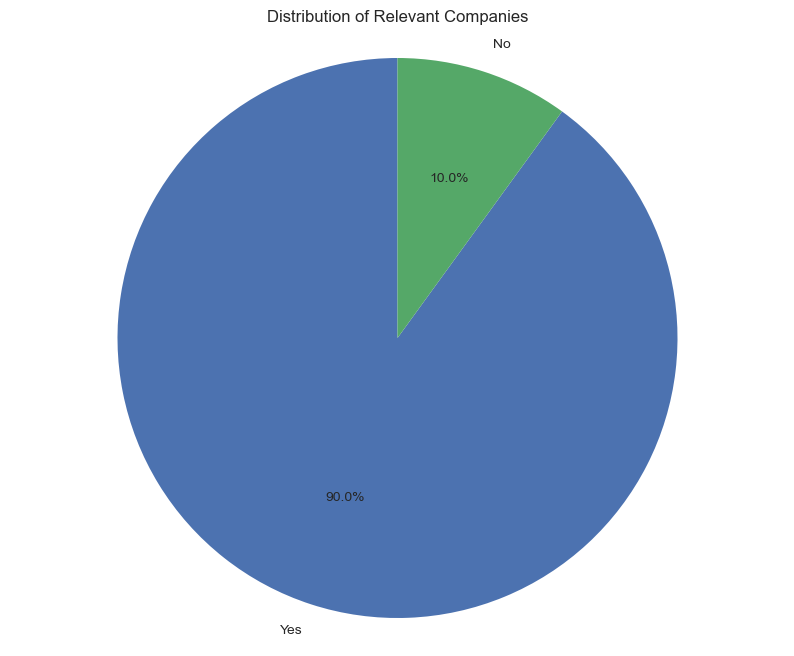

In [10]:
# 2. Pie chart of Relevant Companies
plt.figure(figsize=(10, 8))
plt.pie(relevant_distribution, labels=relevant_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Relevant Companies')
plt.axis('equal')
plt.show()

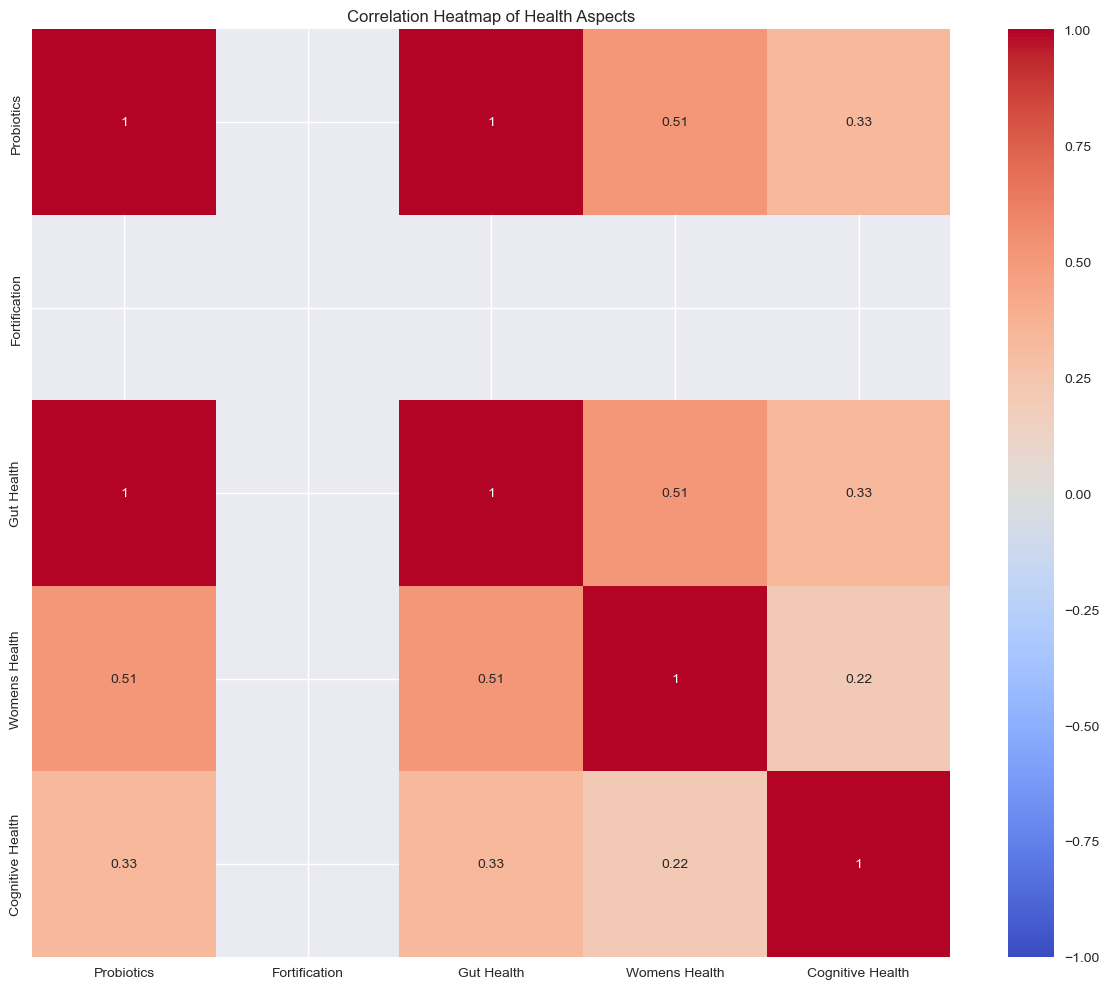

In [11]:
# 3. Heatmap of correlations between different health aspects
health_columns = ['Probiotics', 'Fortification', 'Gut Health', 'Womens Health', 'Cognitive Health']

# Convert 'Yes' to 1 and 'No' to 0 for the health columns
for col in health_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

correlation_matrix = df[health_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Health Aspects')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

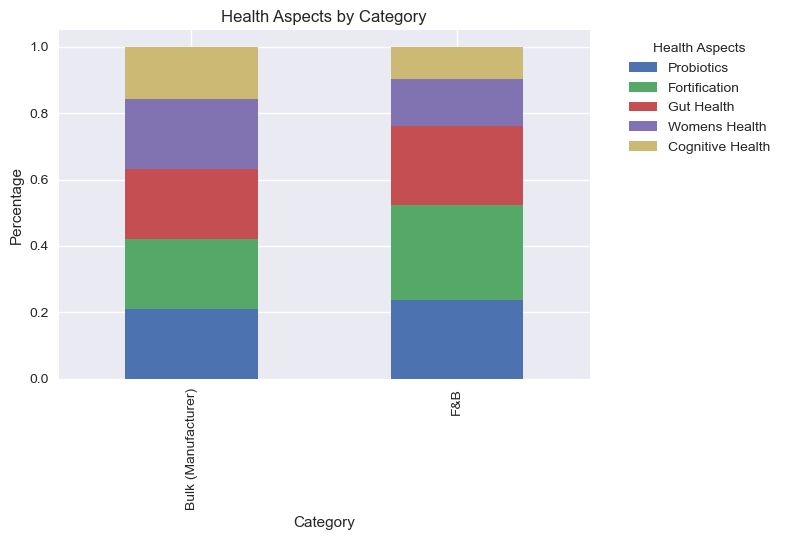

In [12]:
# 4. Stacked bar chart of health aspects by category
health_by_category = df.groupby('Category')[health_columns].sum()
health_by_category_percentage = health_by_category.div(health_by_category.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
health_by_category_percentage.plot(kind='bar', stacked=True)
plt.title('Health Aspects by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Health Aspects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

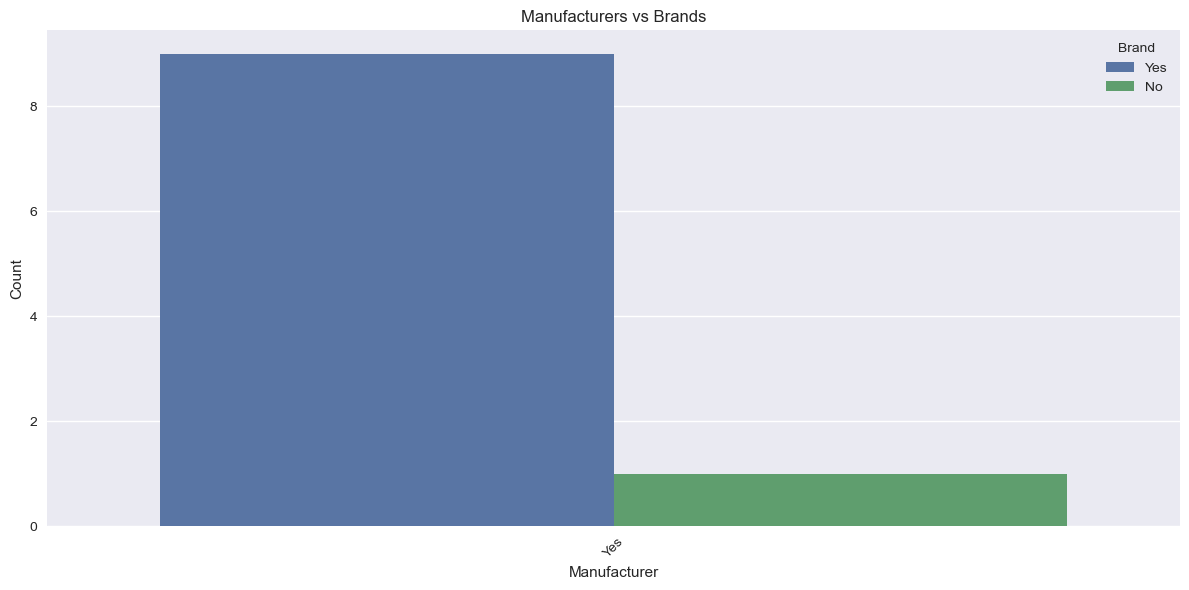

In [13]:
# 5. Count plot of manufacturers vs brands
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Manufacturer', hue='Brand')
plt.title('Manufacturers vs Brands')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Brand', loc='upper right')
plt.tight_layout()
plt.show()

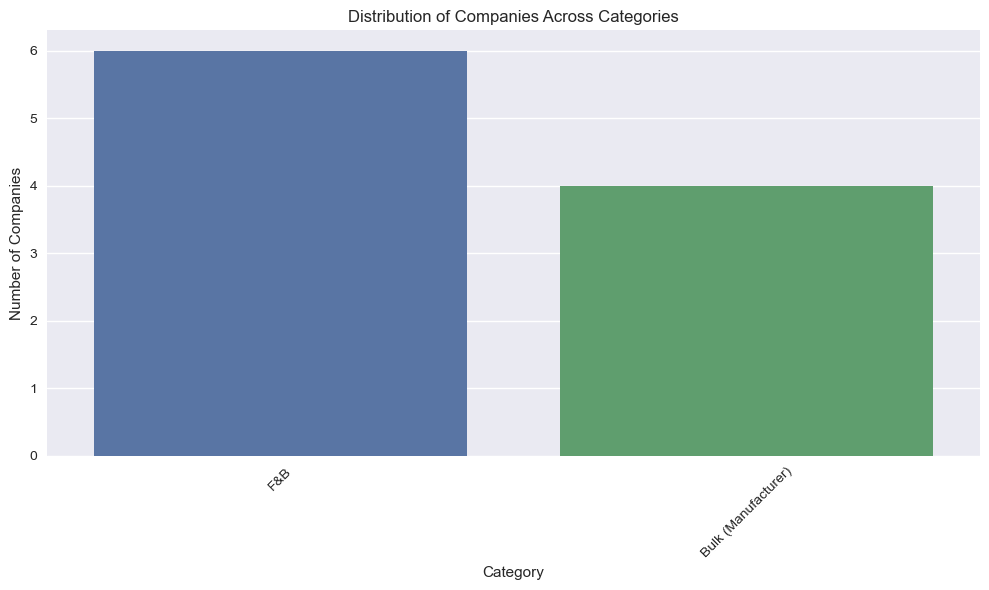

In [14]:
# 6. Distribution of companies across categories
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Companies Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

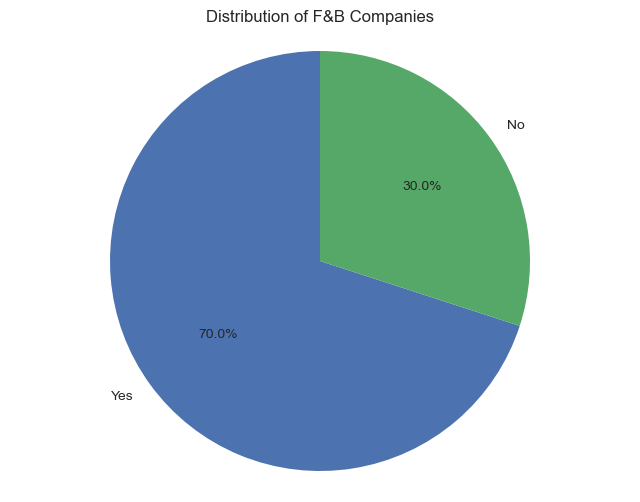

In [15]:
# 7. Distribution of F&B companies
plt.figure(figsize=(8, 6))
fb_distribution = df['F&B'].value_counts()
plt.pie(fb_distribution, labels=fb_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of F&B Companies')
plt.axis('equal')
plt.show()

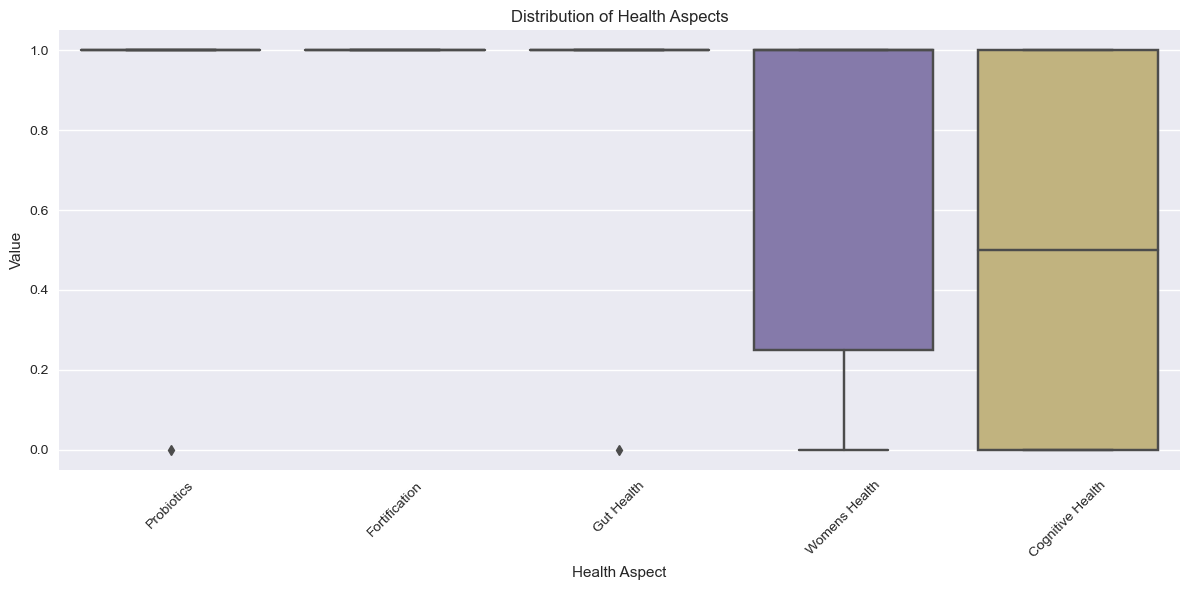

In [16]:
# 9. Boxplot of health aspects
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=['Company'], value_vars=health_columns, var_name='Health Aspect', value_name='Value')
sns.boxplot(data=df_melted, x='Health Aspect', y='Value')
plt.title('Distribution of Health Aspects')
plt.xlabel('Health Aspect')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

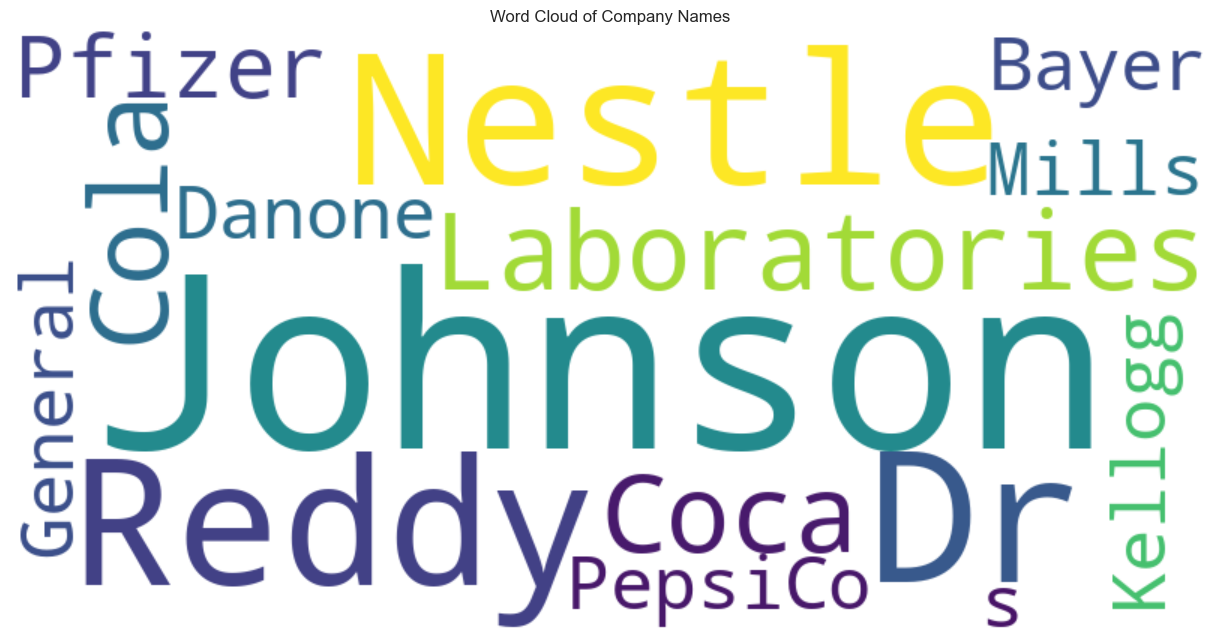

In [17]:
# Word Cloud of Company Names
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Company']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Company Names')
plt.tight_layout(pad=0)
plt.show()

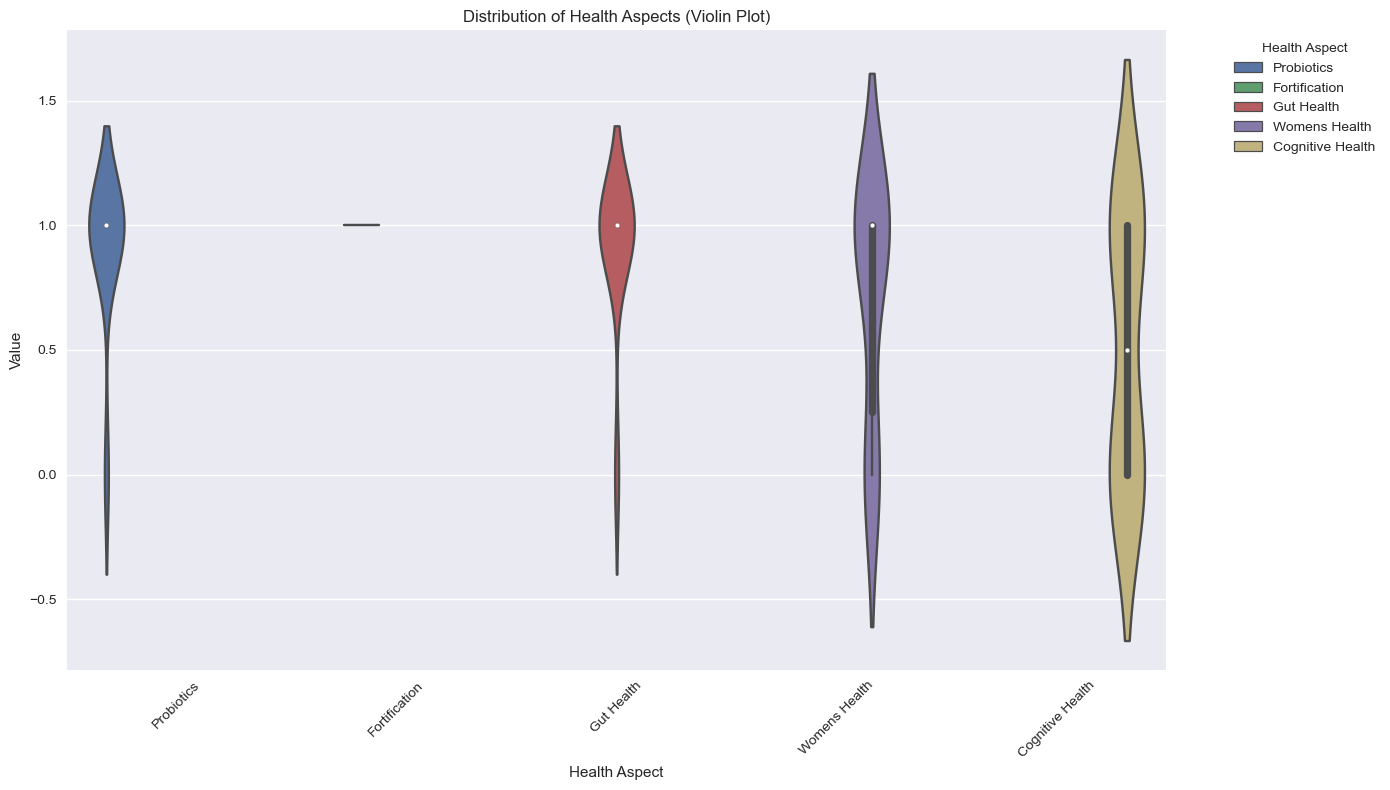

In [18]:
#Violin plot of health aspects distribution
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_melted, x='Health Aspect', y='Value', hue='Health Aspect')
plt.title('Distribution of Health Aspects (Violin Plot)')
plt.xlabel('Health Aspect')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Health Aspect', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()